# Getting Started: Market Research
This Jupyter notebook is a quick demonstration on how to get started on the market research section.

## 1) Download Data
Please download the train and test data and place it within the ./research/data path. If you've placed it in the correct place, you should see the following cell work:

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

# train_data.head()

In [2]:
test_data.head()

,id,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,1,80005,-0.371888,-0.273485,0.538326,-0.377691,1.283159,-0.286957,0.439415,0.020831,-0.295480,0.117643,-0.369900,-0.378902,0.470166,0.411796
1,2,80006,-0.459598,-0.514915,-0.235153,-0.262379,0.044343,-0.429888,-0.059034,-0.725713,-0.407681,-0.255702,-0.461901,-0.249516,-0.216745,-0.328599
2,3,80007,-0.381609,-0.265023,-0.629131,-0.186288,-0.146302,-0.357875,0.114223,-0.359341,-0.190712,-0.404083,-0.272153,-0.193158,-0.679351,-0.476331
3,4,80008,-0.371423,-0.106279,-1.142702,-0.200429,-0.176918,-0.354048,-0.230199,-0.305226,0.185342,-0.333010,0.518678,-0.028775,-0.610620,-0.846772
4,5,80009,-0.309393,-0.015144,-1.099371,-0.405841,-0.239068,-0.403306,-0.983134,-1.067315,-0.105132,-0.809948,0.185197,-0.150254,-1.080190,-0.685936


In [38]:
# lower_q = 0.05
# upper_q = 0.95

# lower_bounds = train_data.quantile(lower_q)
# upper_bounds = train_data.quantile(upper_q)

# train_data = train_data.clip(lower=lower_bounds, upper=upper_bounds, axis=1)
# train_data.info()

## 2) Investigate the Dataset
In the datasets, you're given columns of time and A through N, each of which represent some sort of real-life market quantity. In the train dataset, you're also given Y1 and Y2, real-life market quantities you'd like to predict in terms of time and A through N. You're not given Y1 and Y2 in the test set, because this is what you're being asked to predict.

Let's do some exploration of the relationships of A - N and Y1. In particular, let's look at the relationship between C and Y1:

In [5]:
import pmdarima as pm
from sklearn.metrics import r2_score
# train_data.set_index('time', inplace=True)
# test_data.set_index('time', inplace=True)

def ARIMA(train_series,steps):
    model = pm.auto_arima(train_series, 
                          start_p=1, start_q=1,
                          test='adf',
                          max_p=5, max_q=5,
                          m=1,
                          d=None,
                          seasonal=False,
                          trace=True,
                          error_action='ignore', 
                          suppress_warnings=True,
                          stepwise=True)
    train_pred = model.predict_in_sample()
    r2 = r2_score(train_series, train_pred)
    print(r2)
    result = model.predict(n_periods=steps)
    return result

S = len(test_data)
y1_arima = ARIMA(train_data['Y1'],S)
y2_arima = ARIMA(train_data['Y1'],S)
preds = pd.DataFrame({
    'id': test_data['id'],
    'Y1': y1_arima,
    'Y2': y2_arima
})
preds.reset_index(drop=True, inplace=True)

preds.to_csv('preds.csv', index=False)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=222264.974, Time=12.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=222266.412, Time=3.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=222264.916, Time=4.64 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=222264.852, Time=2.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=222260.459, Time=2.42 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=222256.960, Time=3.89 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=222254.925, Time=12.92 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=222255.915, Time=25.83 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=222257.366, Time=7.03 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=222257.854, Time=11.75 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=222255.956, Time=4.88 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=222256.570, Time=3.09 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=222260.340, Time=4.75 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=222256.231, Time=21.41 sec


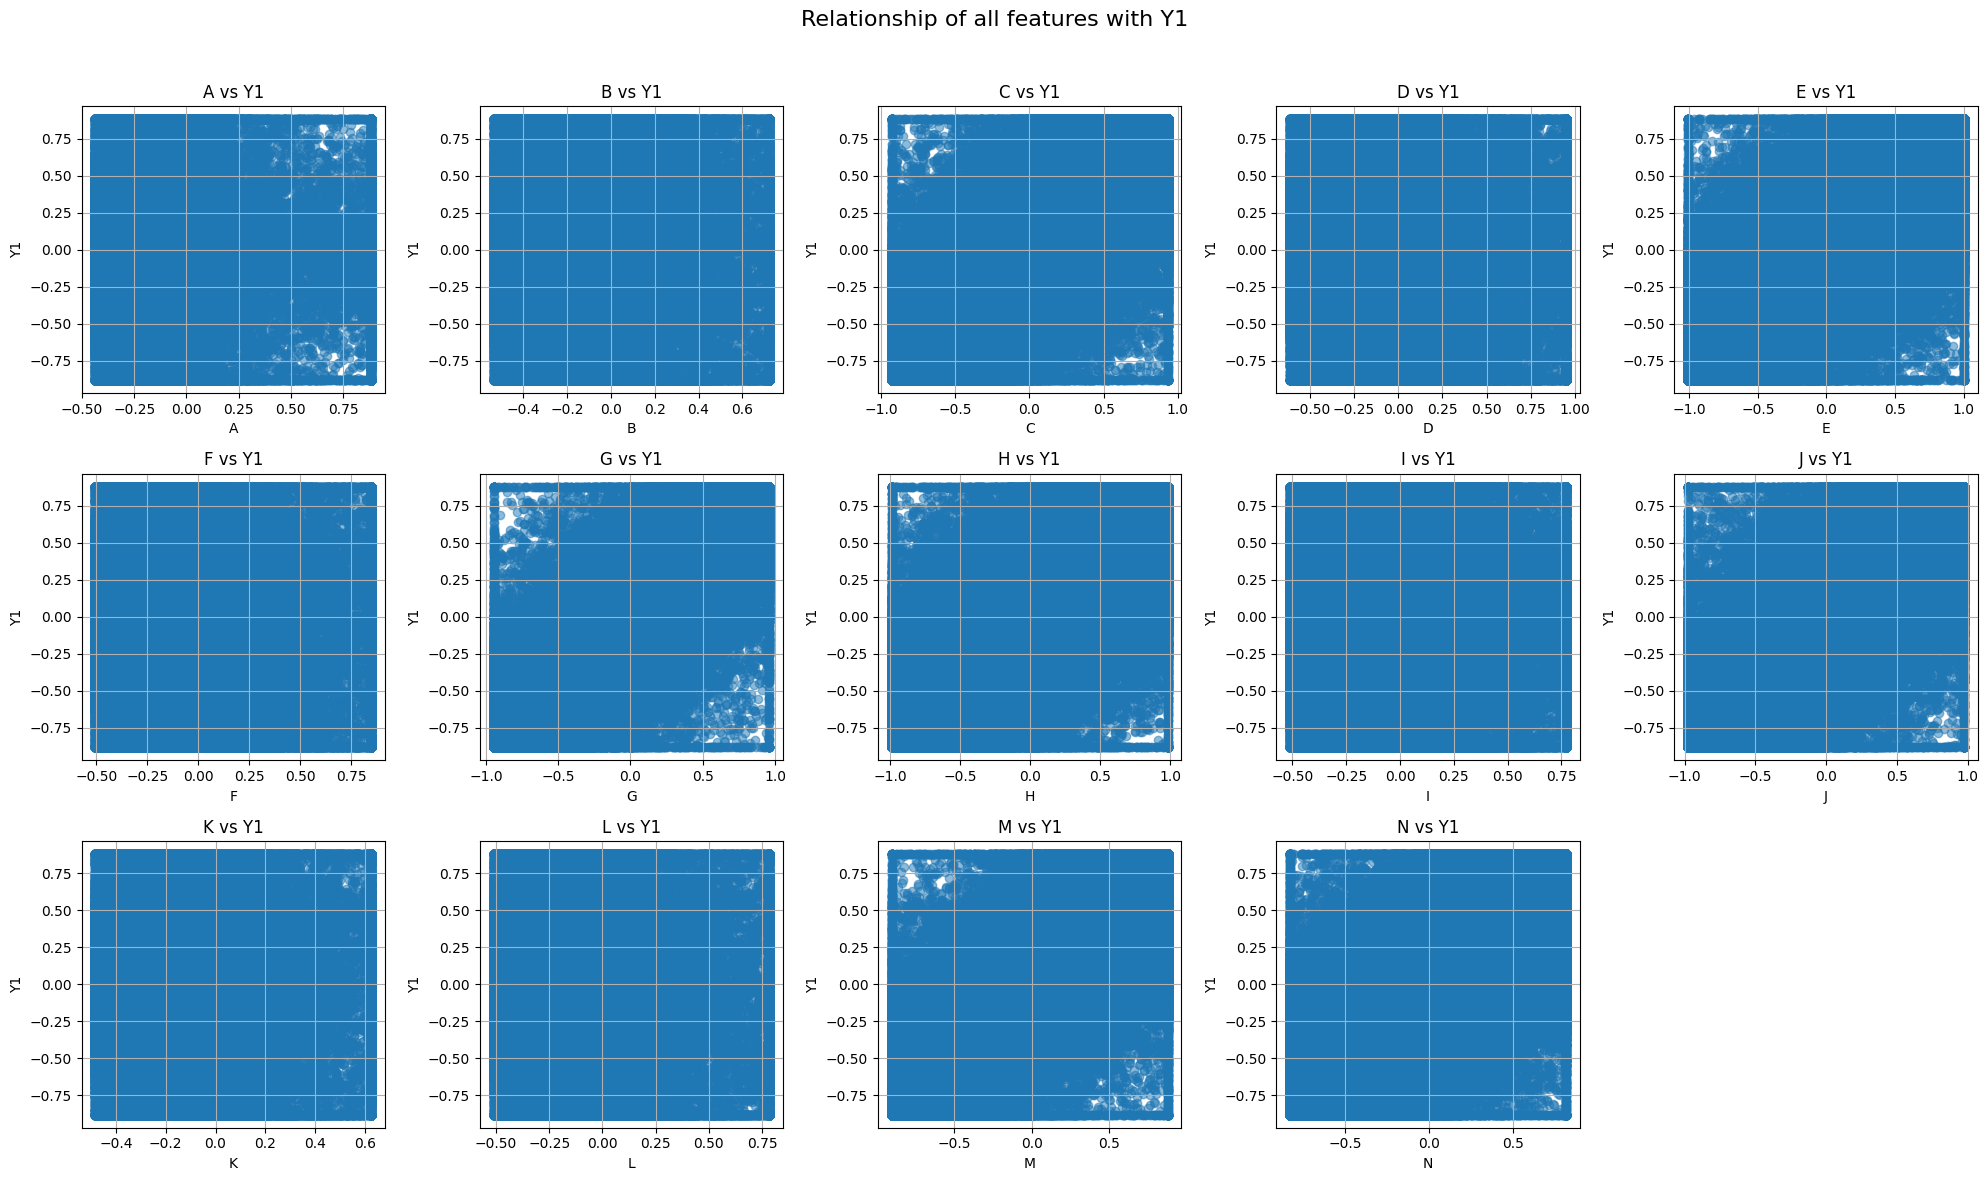

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

features = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
fig.suptitle('Relationship of all features with Y1', fontsize=16)

axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(train_data[feature], train_data['Y1'], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Y1')
    axes[i].set_title(f'{feature} vs Y1')
    axes[i].grid(True)

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

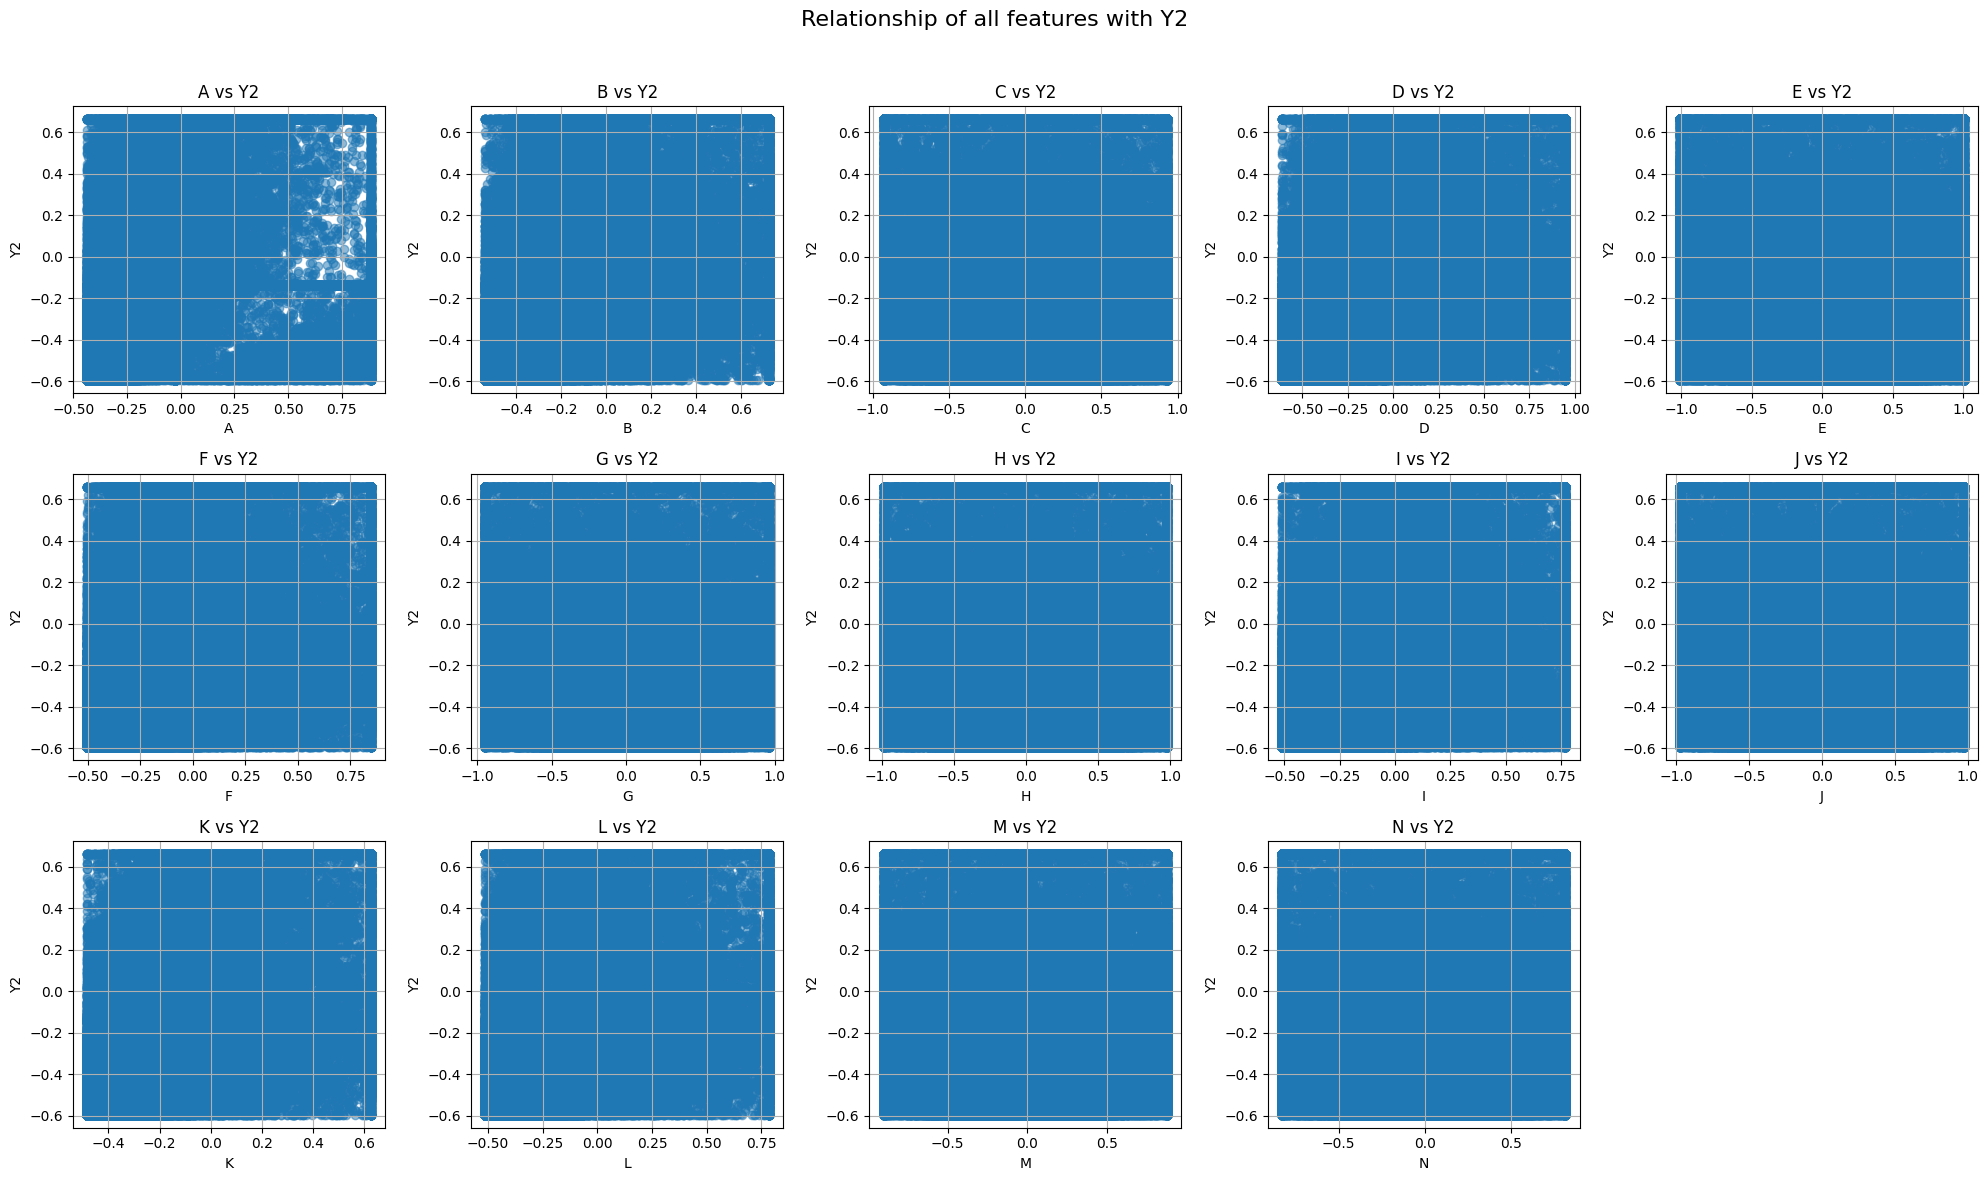

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
fig.suptitle('Relationship of all features with Y2', fontsize=16)

axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(train_data[feature], train_data['Y2'], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Y2')
    axes[i].set_title(f'{feature} vs Y2')
    axes[i].grid(True)

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

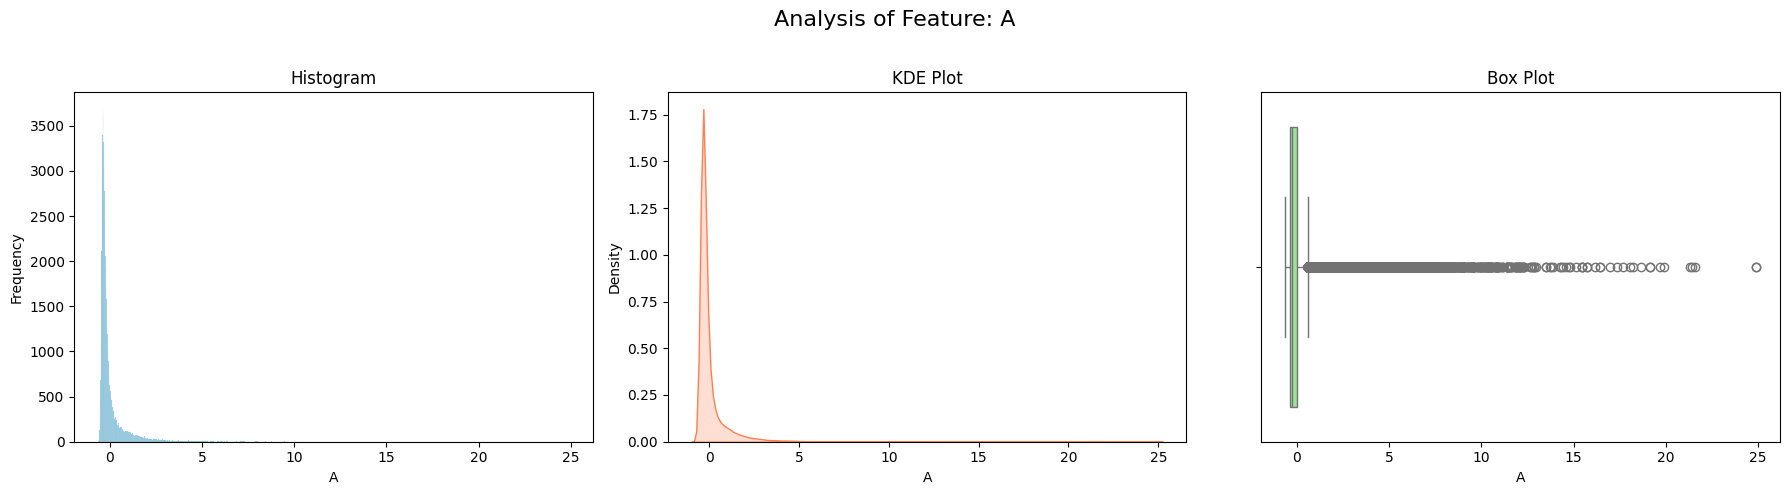

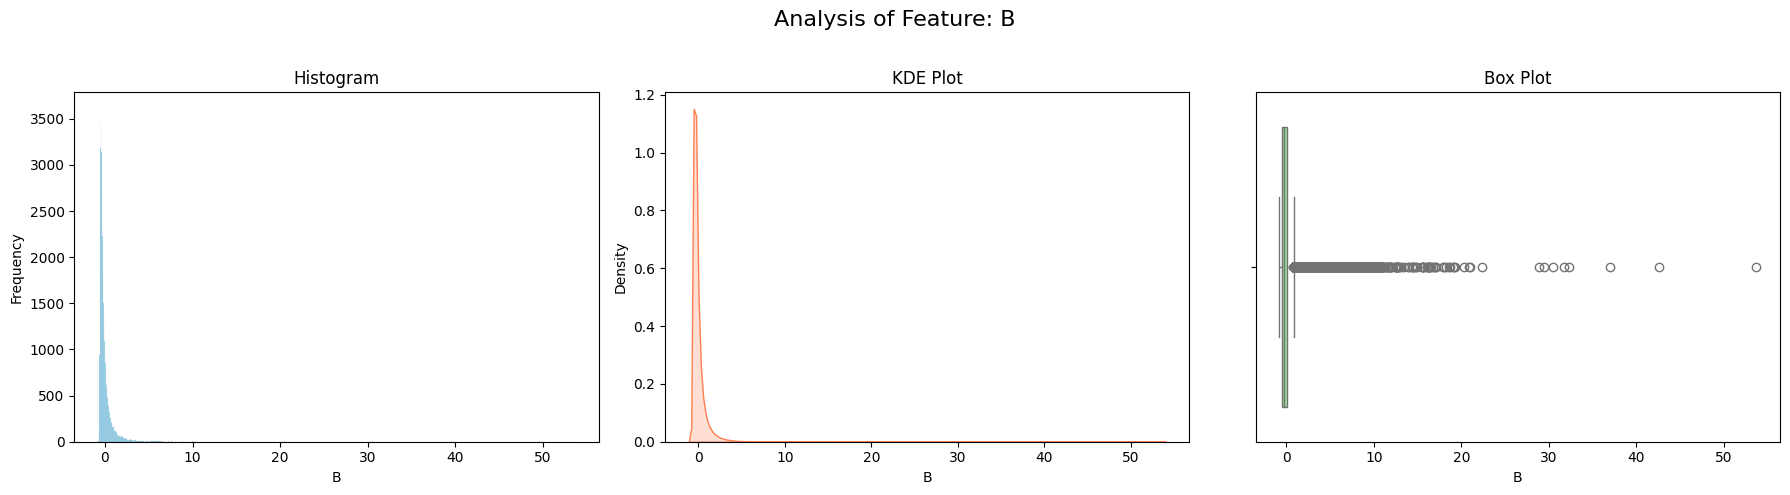

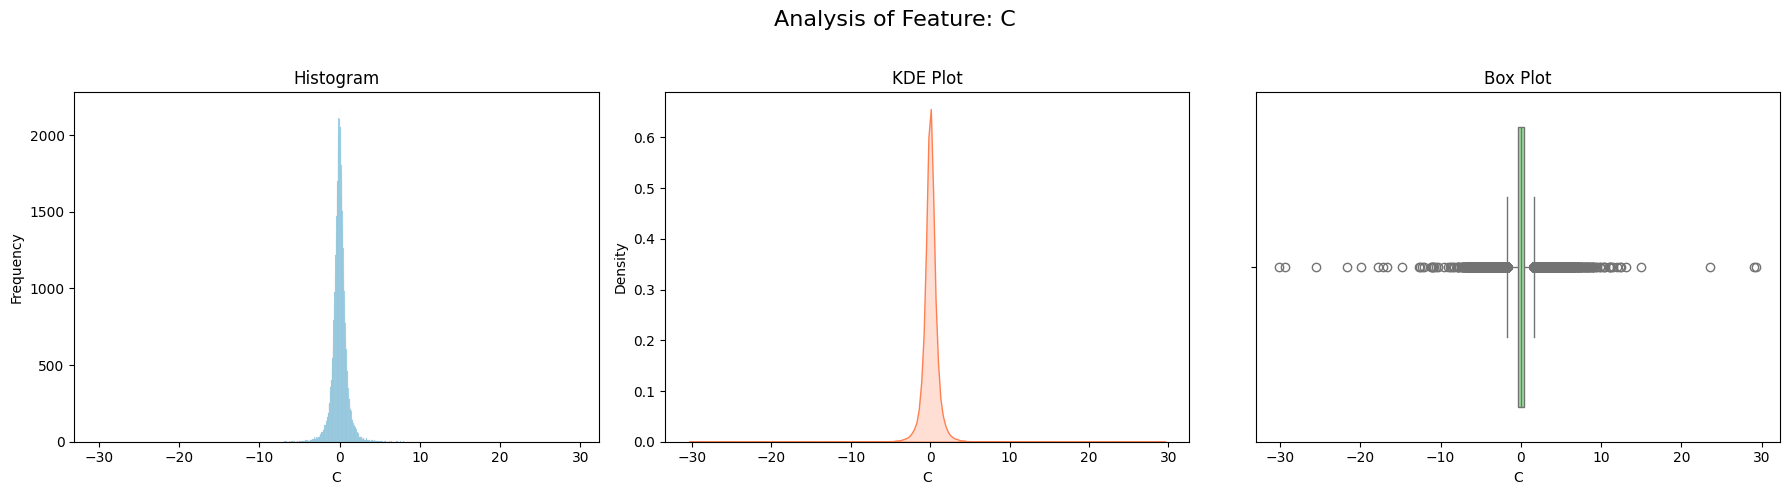

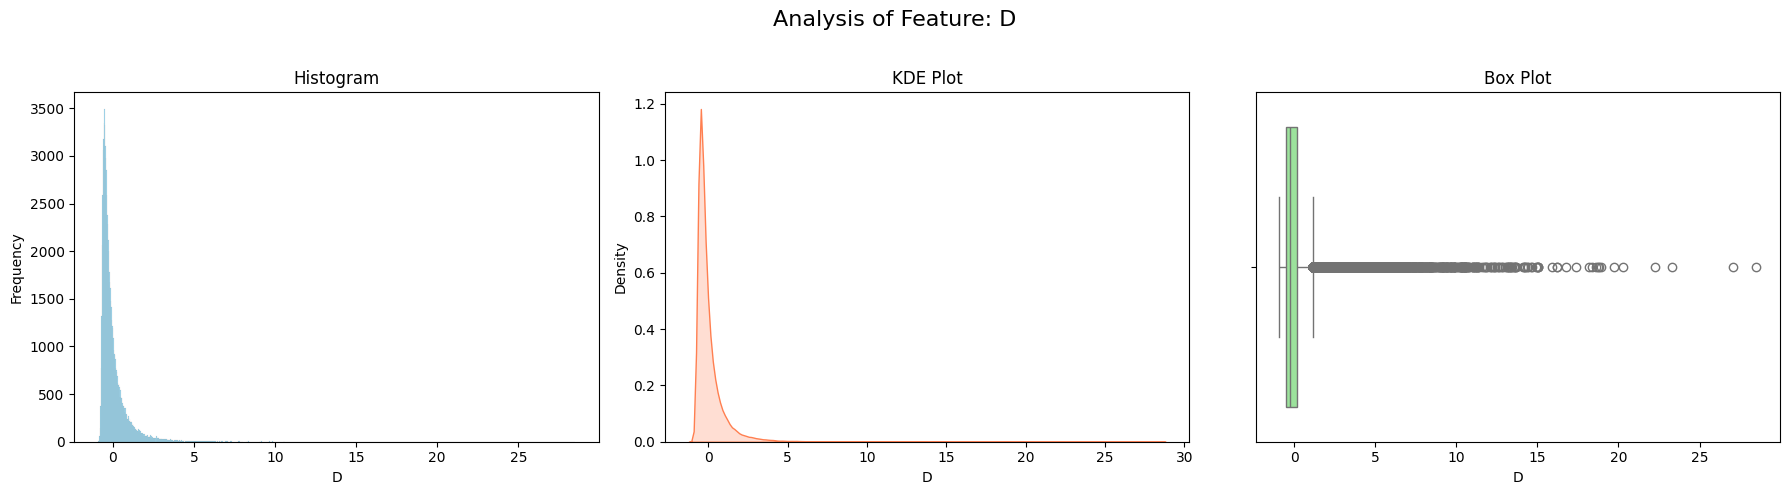

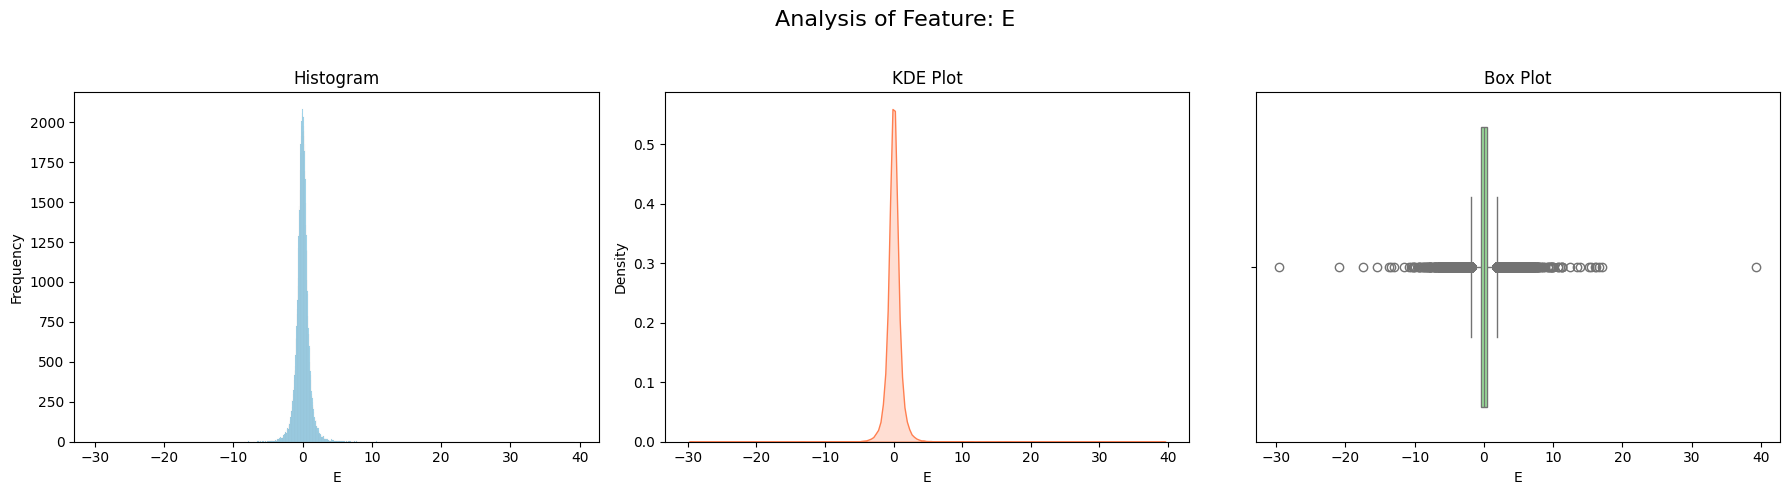

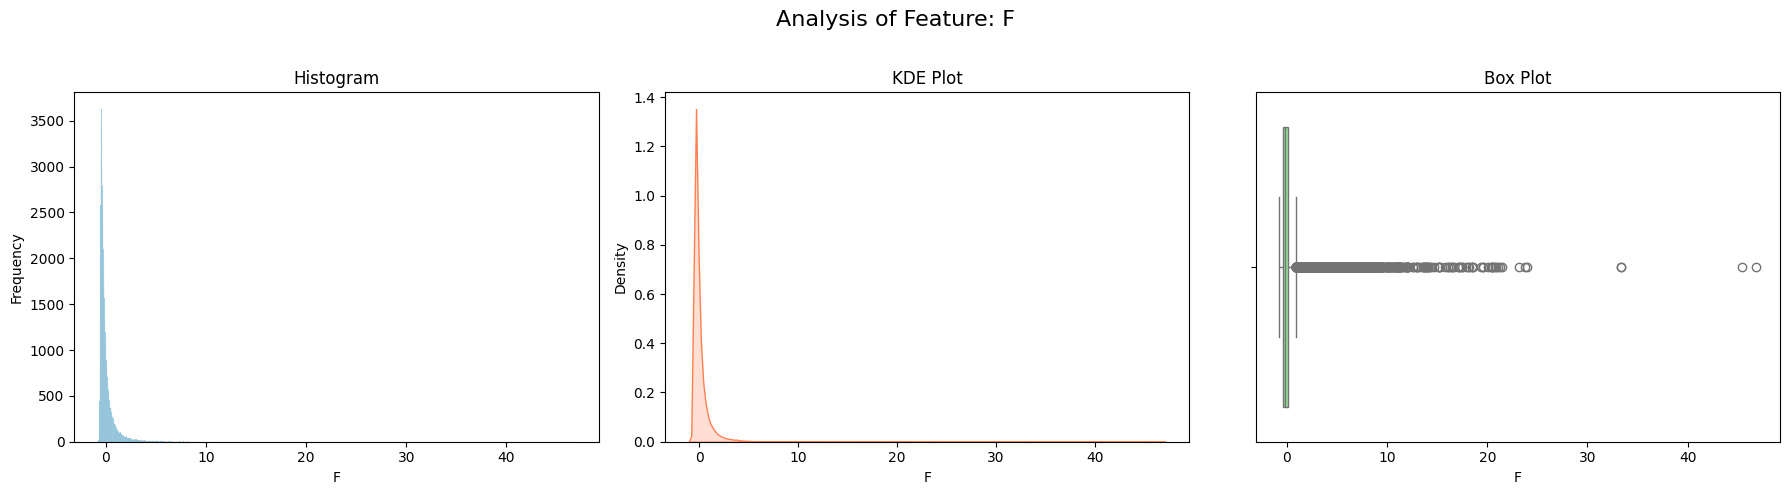

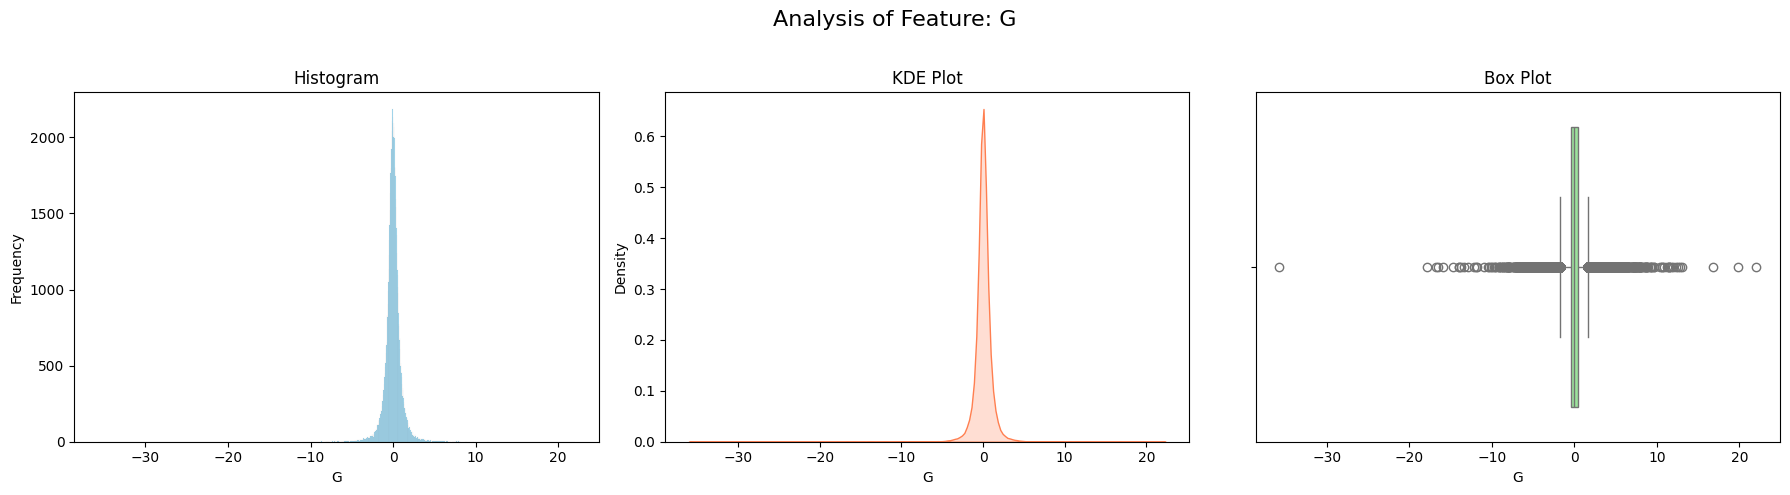

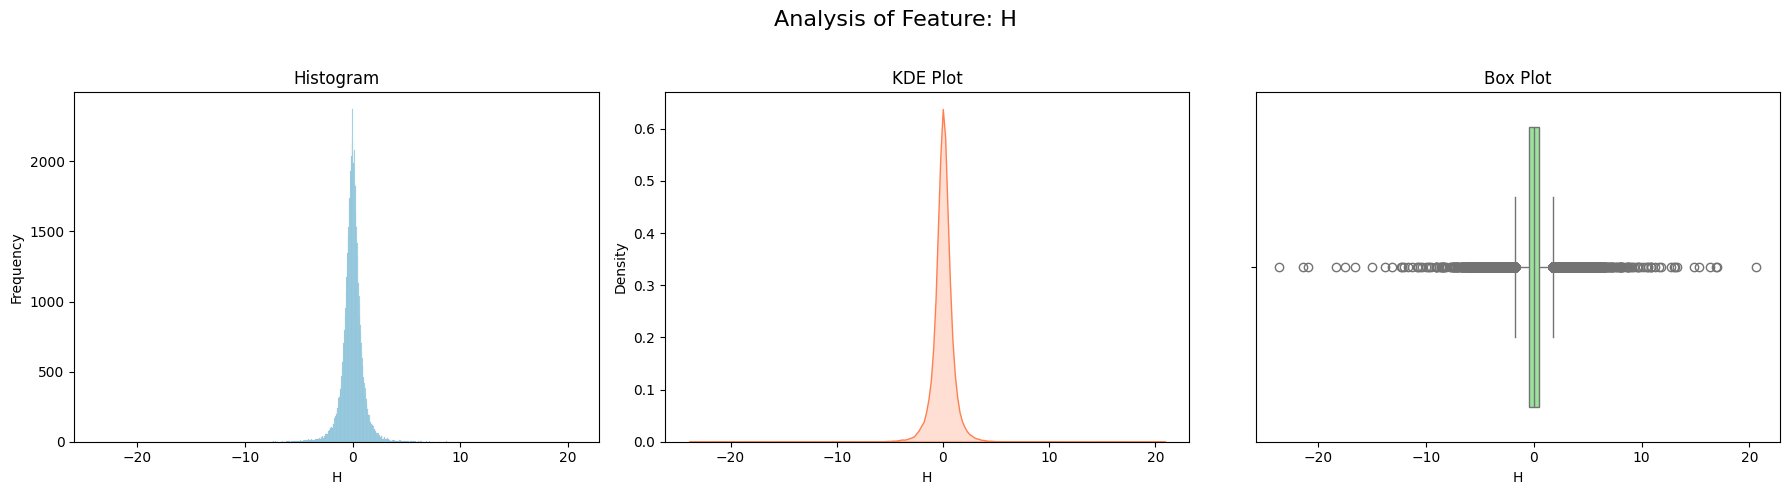

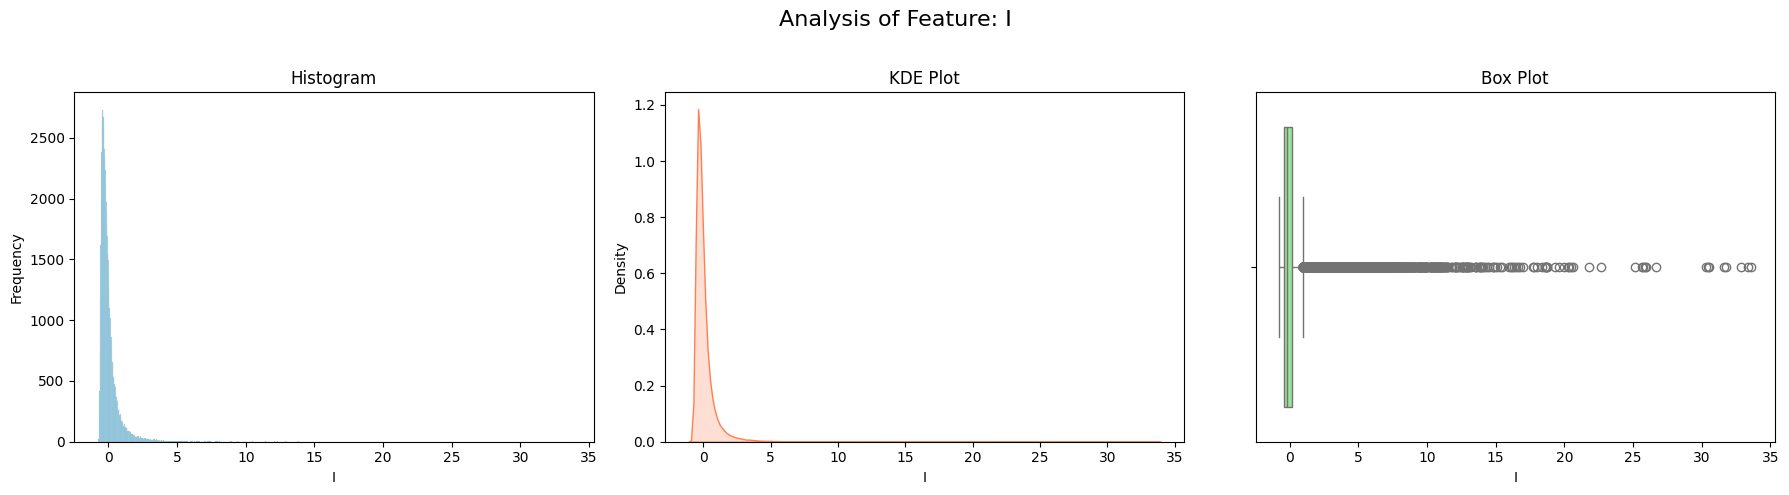

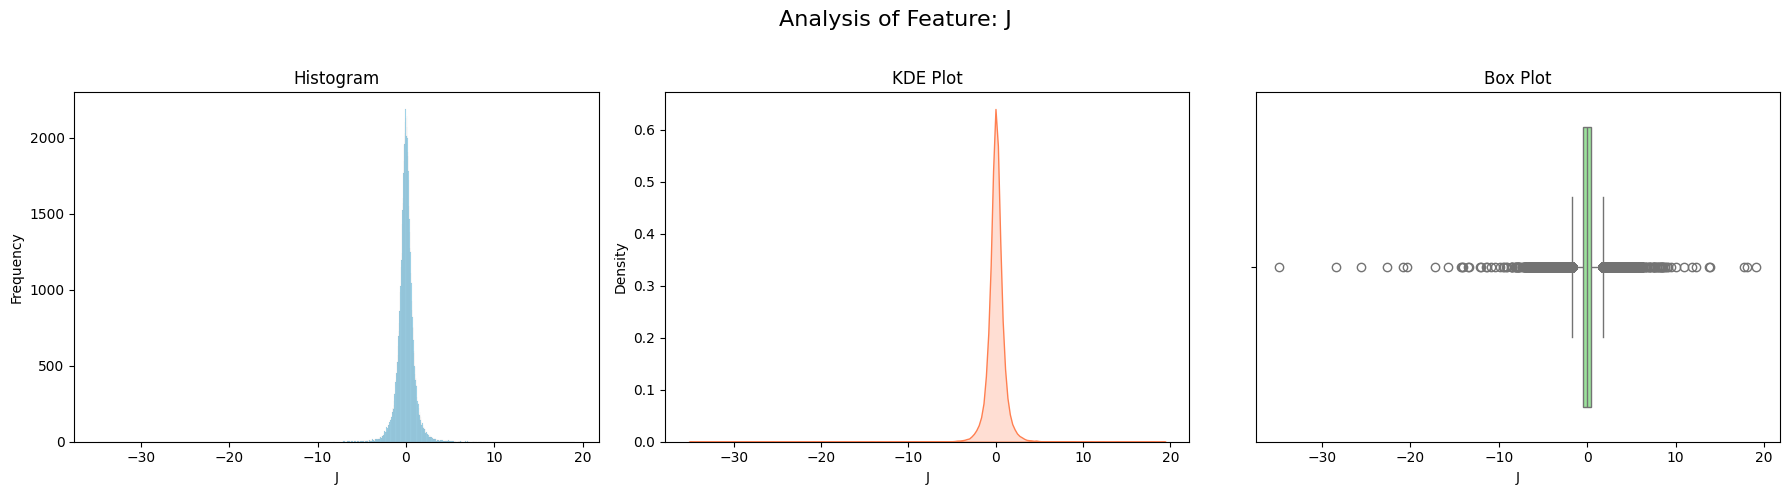

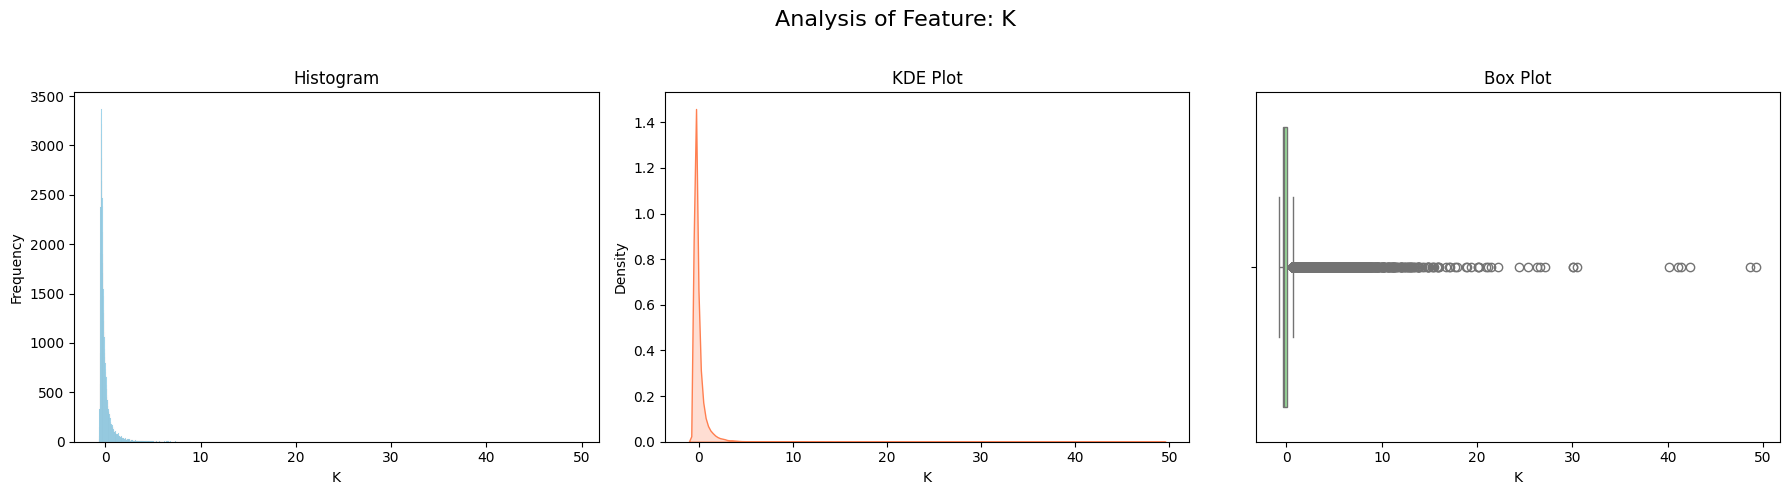

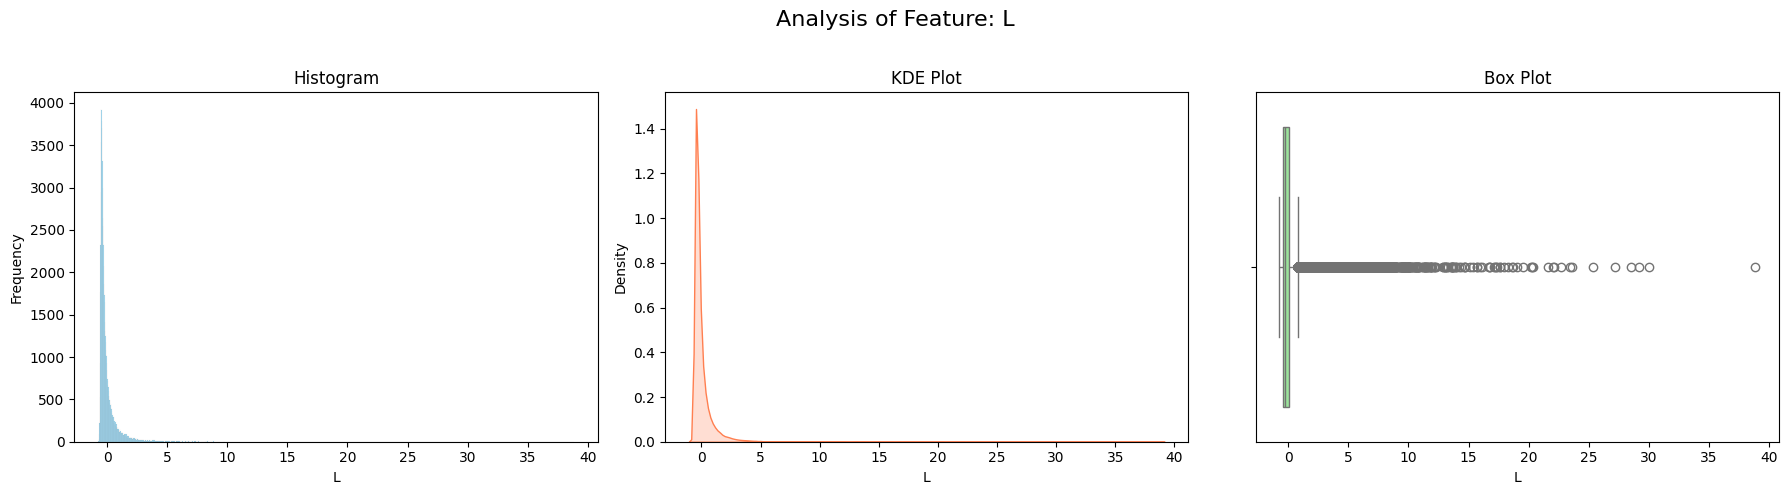

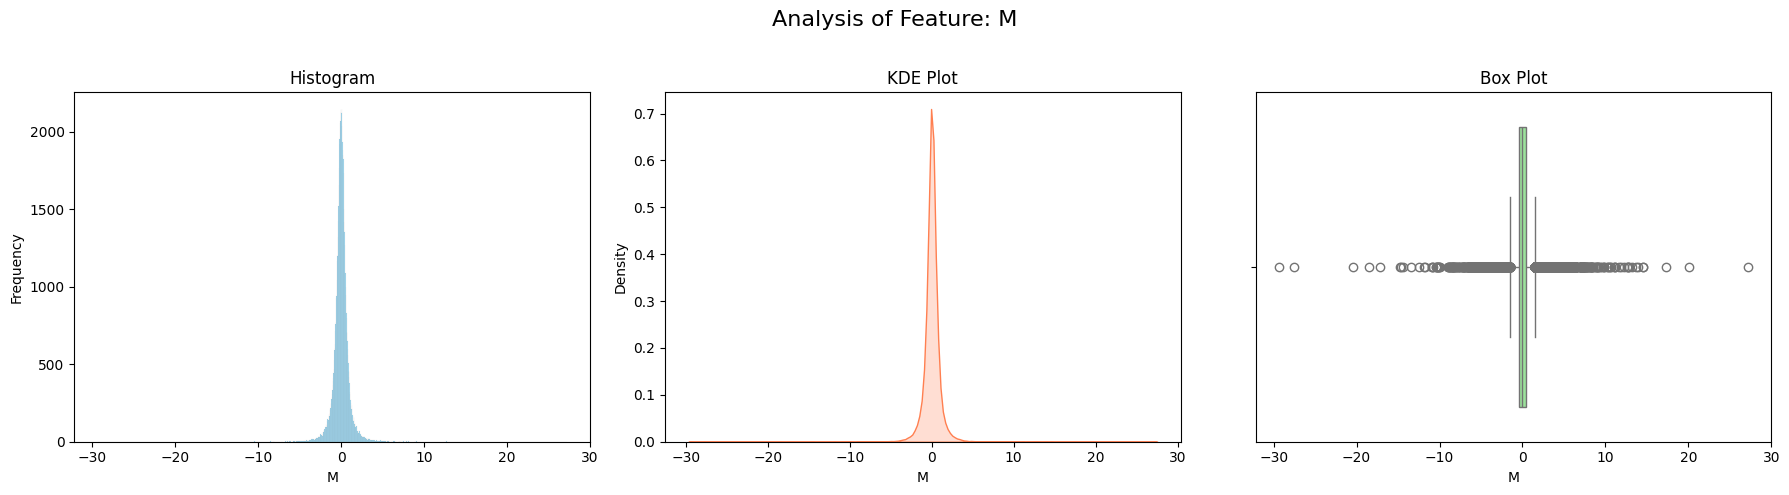

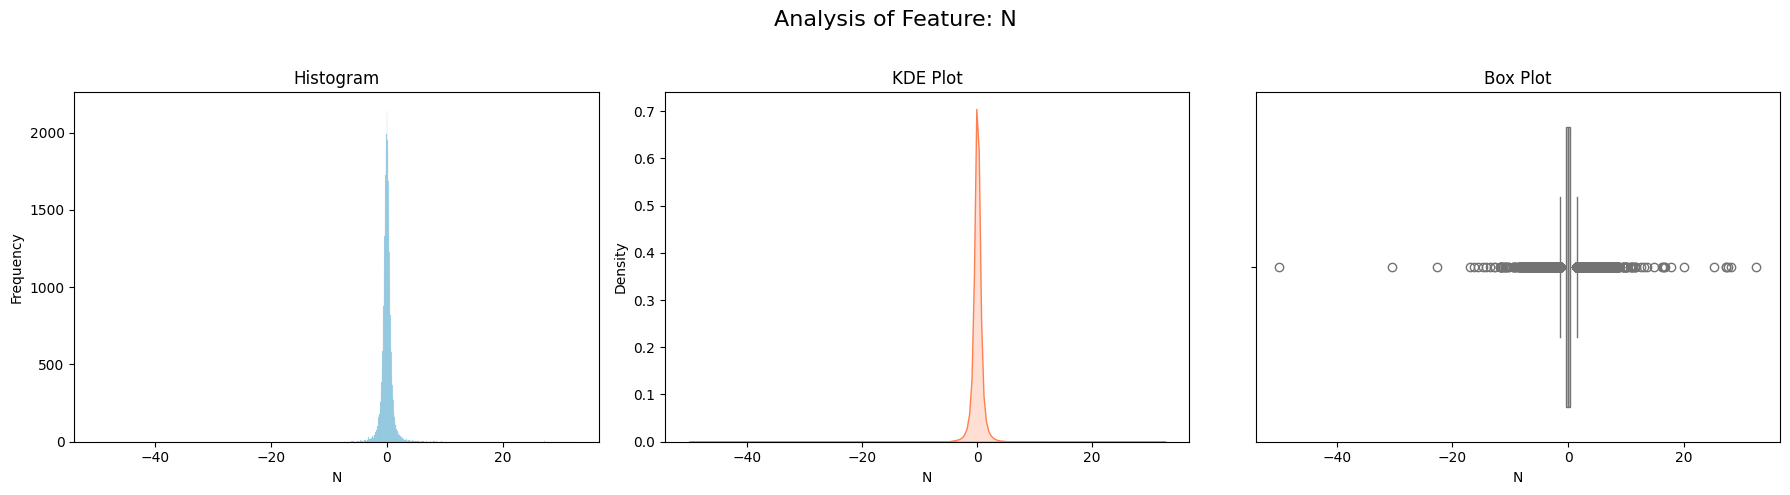

In [39]:
import seaborn as sns

for feature in features:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Analysis of Feature: {feature}', fontsize=16)

    sns.histplot(train_data[feature], kde=False, ax=axes[0], color='skyblue')
    axes[0].set_title('Histogram')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Frequency')

    sns.kdeplot(train_data[feature], fill=True, ax=axes[1], color='coral')
    axes[1].set_title('KDE Plot')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Density')

    sns.boxplot(x=train_data[feature], ax=axes[2], color='lightgreen')
    axes[2].set_title('Box Plot')
    axes[2].set_xlabel(feature)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [40]:
correlation = train_data['A'].corr(train_data['Y1'])
print(f"Correlation between A and Y1: {correlation:.4f}")

correlation = train_data['B'].corr(train_data['Y1'])
print(f"Correlation between B and Y1: {correlation:.4f}")

correlation = train_data['C'].corr(train_data['Y1'])
print(f"Correlation between C and Y1: {correlation:.4f}")

correlation = train_data['D'].corr(train_data['Y1'])
print(f"Correlation between D and Y1: {correlation:.4f}")

correlation = train_data['E'].corr(train_data['Y1'])
print(f"Correlation between E and Y1: {correlation:.4f}")

correlation = train_data['F'].corr(train_data['Y1'])
print(f"Correlation between F and Y1: {correlation:.4f}")

correlation = train_data['G'].corr(train_data['Y1'])
print(f"Correlation between G and Y1: {correlation:.4f}")

correlation = train_data['H'].corr(train_data['Y1'])
print(f"Correlation between H and Y1: {correlation:.4f}")

correlation = train_data['I'].corr(train_data['Y1'])
print(f"Correlation between I and Y1: {correlation:.4f}")

correlation = train_data['J'].corr(train_data['Y1'])
print(f"Correlation between J and Y1: {correlation:.4f}")

correlation = train_data['K'].corr(train_data['Y1'])
print(f"Correlation between K and Y1: {correlation:.4f}")

correlation = train_data['L'].corr(train_data['Y1'])
print(f"Correlation between L and Y1: {correlation:.4f}")

correlation = train_data['M'].corr(train_data['Y1'])
print(f"Correlation between M and Y1: {correlation:.4f}")

correlation = train_data['N'].corr(train_data['Y1'])
print(f"Correlation between N and Y1: {correlation:.4f}")

Correlation between A and Y1: -0.0061
Correlation between B and Y1: -0.0950
Correlation between C and Y1: 0.7038
Correlation between D and Y1: -0.0571
Correlation between E and Y1: 0.6843
Correlation between F and Y1: -0.0732
Correlation between G and Y1: 0.8146
Correlation between H and Y1: 0.7076
Correlation between I and Y1: -0.0902
Correlation between J and Y1: 0.7239
Correlation between K and Y1: -0.0802
Correlation between L and Y1: -0.0724
Correlation between M and Y1: 0.6862
Correlation between N and Y1: 0.5958


In [41]:
correlation = train_data['A'].corr(train_data['Y2'])
print(f"Correlation between A and Y2: {correlation:.4f}")

correlation = train_data['B'].corr(train_data['Y2'])
print(f"Correlation between B and Y2: {correlation:.4f}")

correlation = train_data['C'].corr(train_data['Y2'])
print(f"Correlation between C and Y2: {correlation:.4f}")

correlation = train_data['D'].corr(train_data['Y2'])
print(f"Correlation between D and Y2: {correlation:.4f}")

correlation = train_data['E'].corr(train_data['Y2'])
print(f"Correlation between E and Y2: {correlation:.4f}")

correlation = train_data['F'].corr(train_data['Y2'])
print(f"Correlation between F and Y2: {correlation:.4f}")

correlation = train_data['G'].corr(train_data['Y2'])
print(f"Correlation between G and Y2: {correlation:.4f}")

correlation = train_data['H'].corr(train_data['Y1'])
print(f"Correlation between H and Y2: {correlation:.4f}")

correlation = train_data['I'].corr(train_data['Y1'])
print(f"Correlation between I and Y2: {correlation:.4f}")

correlation = train_data['J'].corr(train_data['Y1'])
print(f"Correlation between J and Y2: {correlation:.4f}")

correlation = train_data['K'].corr(train_data['Y1'])
print(f"Correlation between K and Y2: {correlation:.4f}")

correlation = train_data['L'].corr(train_data['Y1'])
print(f"Correlation between L and Y2: {correlation:.4f}")

correlation = train_data['M'].corr(train_data['Y1'])
print(f"Correlation between M and Y2: {correlation:.4f}")

correlation = train_data['N'].corr(train_data['Y1'])
print(f"Correlation between N and Y2: {correlation:.4f}")

Correlation between A and Y2: 0.4847
Correlation between B and Y2: 0.5819
Correlation between C and Y2: -0.0730
Correlation between D and Y2: 0.6111
Correlation between E and Y2: -0.0446
Correlation between F and Y2: 0.4967
Correlation between G and Y2: -0.0602
Correlation between H and Y2: 0.7076
Correlation between I and Y2: -0.0902
Correlation between J and Y2: 0.7239
Correlation between K and Y2: -0.0802
Correlation between L and Y2: -0.0724
Correlation between M and Y2: 0.6862
Correlation between N and Y2: 0.5958


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

X = train_data.drop(subset=['Y1','Y2'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative Explained Variance', linestyle='--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Features A-N (2 Components)')
plt.grid(True)
plt.show()

TypeError: DataFrame.drop() got an unexpected keyword argument 'subset'

In [ ]:
cum_var = np.cumsum(explained_variance_ratio)
optimal_k = np.argmax(cum_var >= 0.95) + 1
print("Optimal number of PCs (95% variance):", optimal_k)

Optimal number of PCs (95% variance): 12


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X_scaled = scaler.fit_transform(X)
max_components = X_scaled.shape[1]

scores = []
for k in range(1, max_components + 1):
    pca_k = PCA(n_components=k)
    X_k = pca_k.fit_transform(X_scaled)
    
    model = LinearRegression()
    r2 = cross_val_score(model, X_k, train_data['Y1'], cv=5, scoring='r2').mean()
    scores.append(r2)

best_k = np.argmax(scores) + 1
print("Best k for Y1:", best_k)

Best k for Y1: 14


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X_scaled = scaler.fit_transform(X)
max_components = X_scaled.shape[1]

scores = []
for k in range(1, max_components + 1):
    pca_k = PCA(n_components=k)
    X_k = pca_k.fit_transform(X_scaled)
    
    model = LinearRegression()
    r2 = cross_val_score(model, X_k, train_data['Y2'], cv=5, scoring='r2').mean()
    scores.append(r2)

best_k = np.argmax(scores) + 1
print("Best k for Y2:", best_k)

NameError: name 'scaler' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb

def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

train_clean = train_data.dropna(subset=['Y1','Y2'])
y1_train = train_clean['Y1']

feature_cols = train_clean.drop(columns=['Y1','Y2']).columns
X_train_features = train_clean[feature_cols]
X_test_features = test_data[feature_cols]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)

model_candidates = [
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso(max_iter=5000)),
    ('RandomForest', RandomForestRegressor(n_estimators=500, max_depth=7, random_state=42)),
    ('XGBoost_GPU', xgb.XGBRegressor(
        n_estimators=500,
        max_depth=7,
        learning_rate=0.05,
        tree_method='hist',
        predictor='gpu_predictor',
        gpu_id=0,
        random_state=42
    ))
]

pca_options = [None, 5, 10, 14, min(20, X_train_scaled.shape[1])]

best_r2 = -np.inf
best_model_name = None
best_pca_n = None
best_model = None
best_X_train_transformed = None
best_X_test_transformed = None

for model_name, model in model_candidates:
    for n_comp in pca_options:
        if n_comp is not None:
            pca = PCA(n_components=min(n_comp, X_train_scaled.shape[1]))
            X_train_pca = pca.fit_transform(X_train_scaled)
            X_test_pca = pca.transform(X_test_scaled)
        else:
            X_train_pca = X_train_scaled
            X_test_pca = X_test_scaled

        model.fit(X_train_pca, y1_train)
        y_pred_train = model.predict(X_train_pca)
        r2 = r2_score(y1_train, y_pred_train)

        if r2 > best_r2:
            best_r2 = r2
            best_model_name = model_name
            best_pca_n = n_comp
            best_model = model
            best_X_train_transformed = X_train_pca
            best_X_test_transformed = X_test_pca

        print(f"Model: {model_name}, PCA: {n_comp}, R²: {r2:.4f}")

y1_pred_train = best_model.predict(best_X_train_transformed)
r2_y1 = r2_score(y1_train, y1_pred_train)
adj_r2_y1 = adjusted_r2(r2_y1, best_X_train_transformed.shape[0], best_X_train_transformed.shape[1])
mae_y1 = mean_absolute_error(y1_train, y1_pred_train)
mse_y1 = mean_squared_error(y1_train, y1_pred_train)
rmse_y1 = np.sqrt(mse_y1)

print("\nBest combination:")
print(f"Model: {best_model_name}, PCA components: {best_pca_n}")
print(f"R² (train): {r2_y1:.4f}")
print(f"Adjusted R² (train): {adj_r2_y1:.4f}")
print(f"MAE (train): {mae_y1:.4f}")
print(f"MSE (train): {mse_y1:.4f}")
print(f"RMSE (train): {rmse_y1:.4f}")

y1_pred_test = best_model.predict(best_X_test_transformed)

Model: LinearRegression, PCA: None, R²: 0.7564
Model: LinearRegression, PCA: 5, R²: 0.7241
Model: LinearRegression, PCA: 10, R²: 0.7356
Model: LinearRegression, PCA: 14, R²: 0.7563
Model: LinearRegression, PCA: 15, R²: 0.7564
Model: Ridge, PCA: None, R²: 0.7564
Model: Ridge, PCA: 5, R²: 0.7241
Model: Ridge, PCA: 10, R²: 0.7356
Model: Ridge, PCA: 14, R²: 0.7563
Model: Ridge, PCA: 15, R²: 0.7564
Model: Lasso, PCA: None, R²: 0.0000
Model: Lasso, PCA: 5, R²: 0.4738
Model: Lasso, PCA: 10, R²: 0.4738
Model: Lasso, PCA: 14, R²: 0.4738
Model: Lasso, PCA: 15, R²: 0.4738
Model: RandomForest, PCA: None, R²: 0.7967
Model: RandomForest, PCA: 5, R²: 0.7626
Model: RandomForest, PCA: 10, R²: 0.7706
Model: RandomForest, PCA: 14, R²: 0.7759


In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

print("Y2")

model_y2 = RandomForestRegressor(n_estimators=500, max_depth=7, random_state=42)
model_y2.fit(X_train_scaled, y2_train)

y2_pred_train = model_y2.predict(X_train_scaled)
r2_y2 = r2_score(y2_train, y2_pred_train)
adj_r2_y2 = adjusted_r2(r2_y2, X_train_scaled.shape[0], X_train_scaled.shape[1])
mae_y2 = mean_absolute_error(y2_train, y2_pred_train)
mse_y2 = mean_squared_error(y2_train, y2_pred_train)
rmse_y2 = np.sqrt(mse_y2)

print(f"R² (train): {r2_y2:.4f}")
print(f"Adjusted R² (train): {adj_r2_y2:.4f}")
print(f"MAE (train): {mae_y2:.4f}")
print(f"MSE (train): {mse_y2:.4f}")
print(f"RMSE (train): {rmse_y2:.4f}")

y2_pred_test = model_y2.predict(X_train_scaled)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X_train_y2 = train_data.drop(columns=['Y1','Y2'])
y_train_y2 = train_data['Y2']

X_test_y2 = test_data[X_train_y2.columns]

rf = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': randint(200, 1000),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rf_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rf_search.fit(X_train_y2, y_train_y2)

print("Best RF parameters:", rf_search.best_params_)
print("Best CV R²:", rf_search.best_score_)

best_rf = rf_search.best_estimator_
y2_pred_train = best_rf.predict(X_train_y2)

r2_y2 = r2_score(y_train_y2, y2_pred_train)
adj_r2_y2 = adjusted_r2(r2_y2, X_train_y2.shape[0], X_train_y2.shape[1])
mae_y2 = mean_absolute_error(y_train_y2, y2_pred_train)
mse_y2 = mean_squared_error(y_train_y2, y2_pred_train)
rmse_y2 = np.sqrt(mse_y2)

print("\nTraining metrics:")
print(f"R² (train): {r2_y2:.4f}")
print(f"Adjusted R² (train): {adj_r2_y2:.4f}")
print(f"MAE (train): {mae_y2:.4f}")
print(f"MSE (train): {mse_y2:.4f}")
print(f"RMSE (train): {rmse_y2:.4f}")

y2_pred_test = best_rf.predict(X_test_y2)

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import ParameterSampler, KFold
from scipy.stats import randint, uniform

def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

X_train_y2 = train_data.drop(columns=['Y1','Y2'])
y_train_y2 = train_data['Y2']
X_test_y2 = test_data[X_train_y2.columns]

param_dist = {
    'max_depth': randint(3, 10),
    'n_estimators': randint(200, 800),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

n_iter = 20
param_list = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=42))

dtrain = xgb.DMatrix(X_train_y2, label=y_train_y2)
dtest = xgb.DMatrix(X_test_y2)

best_cv_r2 = -np.inf
best_params = None
best_model = None

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i, params in enumerate(param_list):
    params.update({
        'objective': 'reg:squarederror',
        'tree_method': 'hist',
        'gpu_id': 0
    })

    cv_r2_scores = []

    for train_idx, val_idx in kf.split(X_train_y2):
        X_tr, X_val = X_train_y2.iloc[train_idx], X_train_y2.iloc[val_idx]
        y_tr, y_val = y_train_y2.iloc[train_idx], y_train_y2.iloc[val_idx]

        dtr = xgb.DMatrix(X_tr, label=y_tr)
        dval = xgb.DMatrix(X_val, label=y_val)

        model = xgb.train(params, dtr, num_boost_round=params['n_estimators'], verbose_eval=False)
        y_val_pred = model.predict(dval)
        r2_val = r2_score(y_val, y_val_pred)
        cv_r2_scores.append(r2_val)

    mean_cv_r2 = np.mean(cv_r2_scores)

    if mean_cv_r2 > best_cv_r2:
        best_cv_r2 = mean_cv_r2
        best_params = params
        best_model = xgb.train(params, dtrain, num_boost_round=params['n_estimators'], verbose_eval=False)

    print(f"Candidate {i+1}/{n_iter} - CV R²: {mean_cv_r2:.4f}")

print("\nBest parameters found:")
print(best_params)
print(f"Best CV R²: {best_cv_r2:.4f}")

y2_pred_train = best_model.predict(dtrain)
r2_y2 = r2_score(y_train_y2, y2_pred_train)
adj_r2_y2 = adjusted_r2(r2_y2, X_train_y2.shape[0], X_train_y2.shape[1])
mae_y2 = mean_absolute_error(y_train_y2, y2_pred_train)
mse_y2 = mean_squared_error(y_train_y2, y2_pred_train)
rmse_y2 = np.sqrt(mse_y2)

print("\nTraining metrics (best model):")
print(f"R² (train): {r2_y2:.4f}")
print(f"Adjusted R² (train): {adj_r2_y2:.4f}")
print(f"MAE (train): {mae_y2:.4f}")
print(f"MSE (train): {mse_y2:.4f}")
print(f"RMSE (train): {rmse_y2:.4f}")

In [10]:
preds = pd.DataFrame({
    'id': test_data['id'],
    'Y1': y1_pred_test,
    'Y2': y2_pred_test
})

preds.to_csv('preds.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

X_train = train_data[features]
train_data['Y1'] = train_data['Y1']
y2_train = train_data['Y2']

X_test = test_data[features]

degree = 2
print(f"degree = {degree}\n")

print("Y1")
model_y1 = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
model_y1.fit(X_train, train_data['Y1'])

y1_pred_train = model_y1.predict(X_train)
r2_train_data['Y1'] = r2_score(train_data['Y1'], y1_pred_train)
print(f"R-squared score on training data for Y1: {r2_train_data['Y1']:.4f}")

y1_pred_test = model_y1.predict(X_test)

print("\nY2")
model_y2 = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
model_y2.fit(X_train, y2_train)

y2_pred_train = model_y2.predict(X_train)
r2_y2_train = r2_score(y2_train, y2_pred_train)
print(f"R-squared score on training data for Y2: {r2_y2_train:.4f}")

y2_pred_test = model_y2.predict(X_test)

preds = pd.DataFrame({
    'id': test_data['id'],
    'Y1': y1_pred_test,
    'Y2': y2_pred_test
})
# preds.to_csv('preds.csv', index=False)

degree = 2

Y1
R-squared score on training data for Y1: 0.5662

Y2
R-squared score on training data for Y2: 0.4125


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

X_train = train_data[features]
train_data['Y1'] = train_data['Y1']
y2_train = train_data['Y2']

X_test = test_data[features]

n_components = 3
degree = 2
print(f"PCA {n_components} components and degree = {degree}\n")

print("Y1")
pipeline_y1 = make_pipeline(
    StandardScaler(),
    PCA(n_components=n_components),
    PolynomialFeatures(degree=degree),
    LinearRegression()
)

pipeline_y1.fit(X_train, train_data['Y1'])

y1_pred_train = pipeline_y1.predict(X_train)
r2_train_data['Y1'] = r2_score(train_data['Y1'], y1_pred_train)
print(f"R-squared score on training data for Y1: {r2_train_data['Y1']:.4f}")

y1_pred_test = pipeline_y1.predict(X_test)

print("Y2")
pipeline_y2 = make_pipeline(
    StandardScaler(),
    PCA(n_components=n_components),
    PolynomialFeatures(degree=degree),
    LinearRegression()
)

pipeline_y2.fit(X_train, y2_train)

y2_pred_train = pipeline_y2.predict(X_train)
r2_y2_train = r2_score(y2_train, y2_pred_train)
print(f"R-squared score on training data for Y2: {r2_y2_train:.4f}")

y2_pred_test = pipeline_y2.predict(X_test)

preds = pd.DataFrame({
    'id': test_data['id'],
    'Y1': y1_pred_test,
    'Y2': y2_pred_test
})

preds.to_csv('preds.csv', index=False)

PCA 3 components and degree = 2

Y1
R-squared score on training data for Y1: 0.5364
Y2
R-squared score on training data for Y2: 0.3682


Clearly there's a strong relationship between C and Y1. You should definitely use C to predict Y1!

## 3) Submit Predictions
In order to submit predictions, we need to make a CSV file with three columns: id, Y1, and Y2. In the below example, we let our predictions of Y1 and Y2 be the means of Y1 and Y2 in the train set.

In [13]:
preds = test_data[['id']]
preds['Y1'] = train_data['Y1'].mean()
preds['Y2'] = train_data['Y2'].mean()
preds

C:\Users\Vatsh Van\AppData\Local\Temp\ipykernel_17476\2816426628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['Y1'] = train_data['Y1'].mean()
C:\Users\Vatsh Van\AppData\Local\Temp\ipykernel_17476\2816426628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['Y2'] = train_data['Y2'].mean()


,id,Y1,Y2
time,,,
80005,1,-0.002807,-0.061172
80006,2,-0.002807,-0.061172
80007,3,-0.002807,-0.061172
80008,4,-0.002807,-0.061172
80009,5,-0.002807,-0.061172
...,...,...,...
95996,15992,-0.002807,-0.061172
95997,15993,-0.002807,-0.061172
95998,15994,-0.002807,-0.061172


In [14]:
# save preds to csv
preds.to_csv('preds.csv', index=False)

You should now be able to submit preds.csv to [https://quantchallenge.org/dashboard/data/upload-predictions](https://quantchallenge.org/dashboard/data/upload-predictions)! Note that you should receive a public $R^2$ score of $-0.042456$ with this set of predictions. You should try to get the highest possible $R^2$ score over the course of these next few days. Be careful of overfitting to the public score, which is only calculated on a subset of the test data—the final score that counts is the private $R^2$ score!